**Business Case: Walmart - Confidence Interval and CLT**

**About Walmart:**

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

Business Problem:

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

**Importing Libraries and Data set**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats


In [ ]:
df=pd.read_csv('walmart_data.txt')

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df[['Product_ID','User_ID']].nunique()

Product_ID    3612
User_ID       5891
dtype: int64

In [ ]:
df.shape

(500863, 10)

**Observations**
* The dataset has 500863 rows and 10 columns

**Data Cleaning**

In [ ]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [ ]:
df['Marital_Status'].replace(0,'Single',inplace=True)
df['Marital_Status'].replace(1,'Married',inplace=True)

In [ ]:
df['Marital_Status'].replace(0,'Single',inplace=True)
df['Marital_Status'].replace(1,'Married',inplace=True)

**Observations**
* The dataset does not have any null values
* We are changing Marital status column for easy calculations

**Summary of the data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [ ]:
df.describe(include='object')

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


In [ ]:
df['Marital_Status'].value_counts()

Marital_Status
Single     324731
Married    225337
Name: count, dtype: int64

**Unilateral Analysis**

In [ ]:
df['Gender'].value_counts()


Gender
M    414259
F    135809
Name: count, dtype: int64

In [ ]:
df['Age'].value_counts().sort_values()

Age
0-17      15102
55+       21504
51-55     38501
46-50     45701
18-25     99660
36-45    110013
26-35    219587
Name: count, dtype: int64

In [ ]:
df['City_Category'].value_counts()

City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64

In [ ]:
df['Marital_Status'].value_counts()

Marital_Status
0    324731
1    225337
Name: count, dtype: int64

In [ ]:
df['Product_Category'].value_counts()

Product_Category
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: count, dtype: int64

**Observations**

*There are 7 unique age groups and most of the purchase belongs to age 26-35 group.

*There are 3 unique citi categories with category B being the highest.

*5 unique values for Stay_in_current_citi_years with 1 being the highest.

*The difference between mean and median seems to be significant for purchase that suggests outliers in the data.




*Out of 550068 data points, 414259's gender is Male and rest are the female. Male purchase count is much higher than female.

*Standard deviation for purchase have significant value which suggests data is more spread out for this attribute.

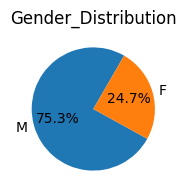

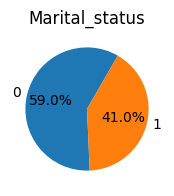

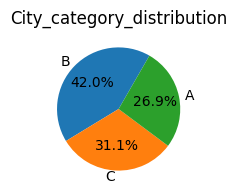

In [ ]:
#Pie chart Visualization
gender_count=df['Gender'].value_counts()
marital_status_count=df['Marital_Status'].value_counts()
city_category_count=df['City_Category'].value_counts()


plt.figure(figsize=(3,2))
plt.pie(gender_count,labels=gender_count.index,autopct='%1.1f%%',startangle=60)
plt.title('Gender_Distribution')
plt.figure(figsize=(3,2))
plt.pie(marital_status_count,labels=marital_status_count.index,autopct='%1.1f%%',startangle=60)
plt.title('Marital_status')
plt.figure(figsize=(3,2))
plt.pie(city_category_count,labels=city_category_count.index,autopct='%1.1f%%',startangle=60)
plt.title('City_category_distribution')
plt.show()

**Observations**

* Gender Distribution - Data indicates a significant disparity in purchase behavior between males and females during the Black Friday event.
* Marital Status - Given that unmarried customers account for a higher percentage of transactions, it may be worthwhile to consider specific marketing campaigns or
promotions that appeal to this group.
* City Category - City B saw the most number of transactions followed by City C and City A respectively

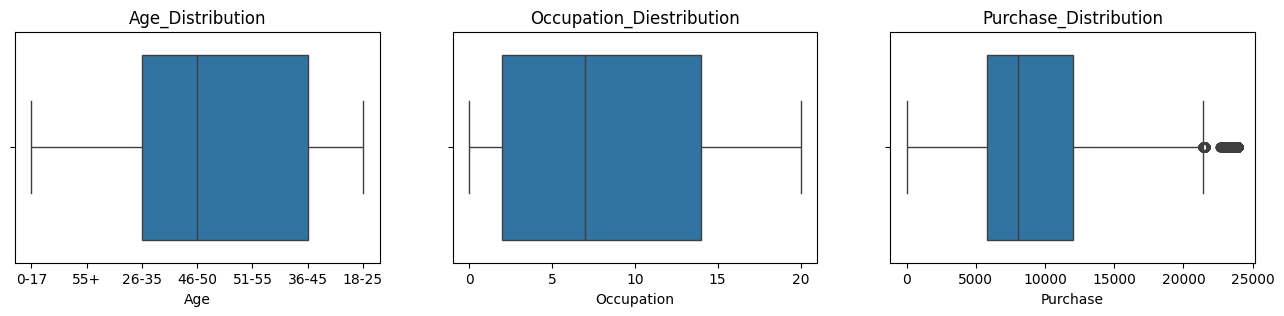

In [ ]:
#Boxplots
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(16,3))
sns.boxplot(x=df['Age'],ax=axes[0])
sns.boxplot(x=df['Occupation'],ax=axes[1])
sns.boxplot(x=df['Purchase'],ax=axes[2])
axes[0].set_title('Age_Distribution')
axes[1].set_title('Occupation_Diestribution')
axes[2].set_title('Purchase_Distribution')
plt.show()


**Observations**
* Majority of customers are in the age group of (26-35) to (36-45)
* Majprity of the customers occupation is between 2 and 13
* Mostly users shop from 6000-12000

**3. Data Exploration ( Multi- Varient Analysis)**

<ipython-input-63-7885897024d2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Gender'], y=df['Purchase'], data=df,palette=palette, ax=axes[0,0])
<ipython-input-63-7885897024d2>:5: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(x=df['Gender'], y=df['Purchase'], data=df,palette=palette, ax=axes[0,0])
<ipython-input-63-7885897024d2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Age'], y=df['Purchase'], data=df,palette=palette, ax=axes[0,1])
<ipython-input-63-7885897024d2>:6: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x

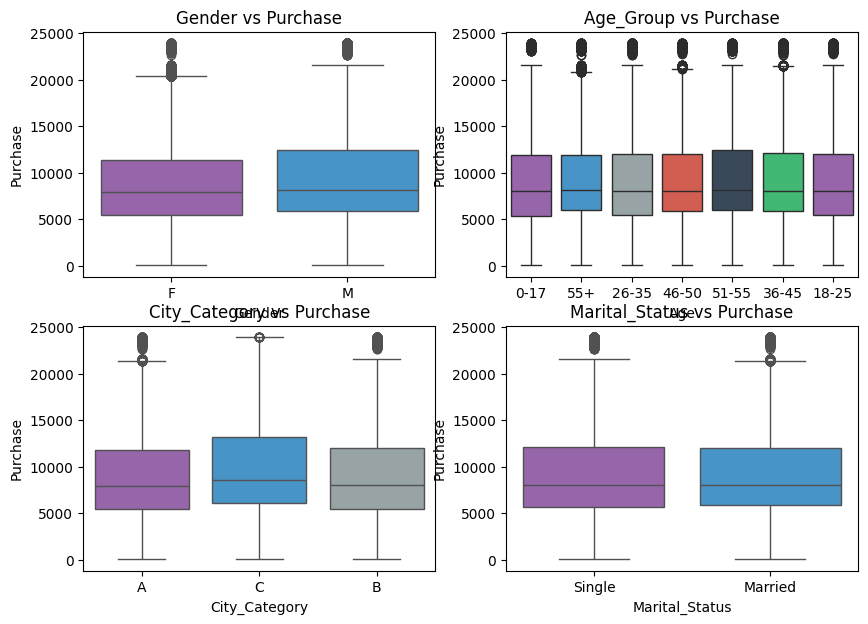

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
palette = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]


sns.boxplot(x=df['Gender'], y=df['Purchase'], data=df,palette=palette, ax=axes[0,0])
sns.boxplot(x=df['Age'], y=df['Purchase'], data=df,palette=palette, ax=axes[0,1])
sns.boxplot(x=df['City_Category'],y=df['Purchase'],data=df,palette=palette,ax=axes[1,0])
sns.boxplot(x=df['Marital_Status'], y=df['Purchase'], data=df,palette=palette, ax=axes[1,1])

axes[0,0].set_title('Gender vs Purchase')
axes[0,1].set_title('Age_Group vs Purchase')
axes[1,0].set_title('City_Category vs Purchase')
axes[1,1].set_title('Marital_Status vs Purchase')\

plt.show()








**Observations**
* The spending behaviour for males and females are similar as we had seen from the above histplot. Males purchasing value are in the little higher range than females.
* Among differnt age categories, we see similar purchase behaviour. For all age groups, most of the purchases are of the values between 5k to 12k with all have some outliers.
* Similarly for City category, stay in current city years, marital status - we see the users spends mostly in the range of 5k to 12k.



<ipython-input-73-18191b09c952>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Product_Category'], y=df['Purchase'], data=df,palette=palette, ax=axes[0])
<ipython-input-73-18191b09c952>:5: UserWarning: 
The palette list has fewer values (6) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x=df['Product_Category'], y=df['Purchase'], data=df,palette=palette, ax=axes[0])
<ipython-input-73-18191b09c952>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Occupation'], y=df['Purchase'], data=df,palette=palette, ax=axes[1])
<ipython-input-73-18191b09c952>:6: UserWarning: 
The palette list has fewer values (6) than needed (21) and will cycle, wh

Text(0.5, 1.0, 'Occupation vs Purchase')

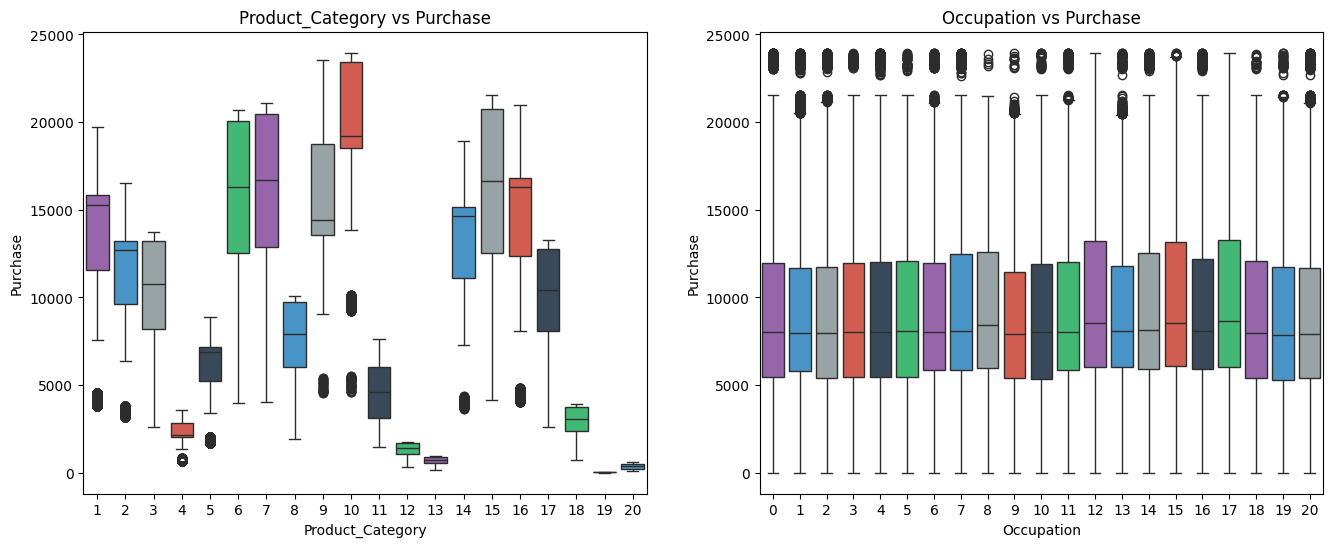

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
palette = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]


sns.boxplot(x=df['Product_Category'], y=df['Purchase'], data=df,palette=palette, ax=axes[0])
sns.boxplot(x=df['Occupation'], y=df['Purchase'], data=df,palette=palette, ax=axes[1])
axes[0].set_title('Product_Category vs Purchase')
axes[1].set_title('Occupation vs Purchase')


**Observations**
* We see variations among product categories. Product category 10 products are the costliest ones. Also, there are few outliers for some of the product categories.
* Among different occupation as well, we see similar purchasing behaviour in terms of the purchase values.

**Multi-Varient Analysis**

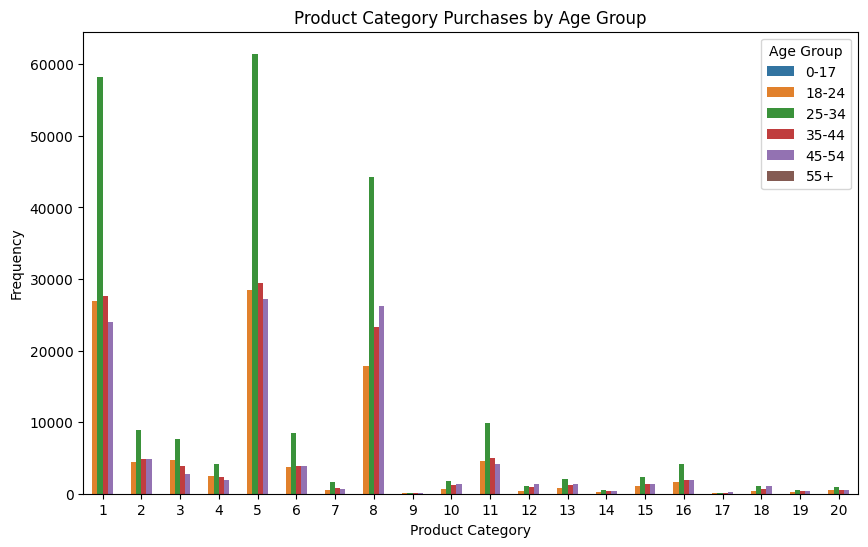

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=product_counts, x='Product_Category', y='Count', hue='Age_Group',estimator=sum)
plt.title('Product Category Purchases by Age Group')
plt.xlabel('Product Category')
plt.ylabel('Frequency')
plt.legend(title='Age Group')
plt.show()

**Observations**
* Here we can clearly see age(25-34) are dominating in all the categories
* Product category 1 ,5,8,11,16 are mostly sold

In [ ]:
# Some other Graphs

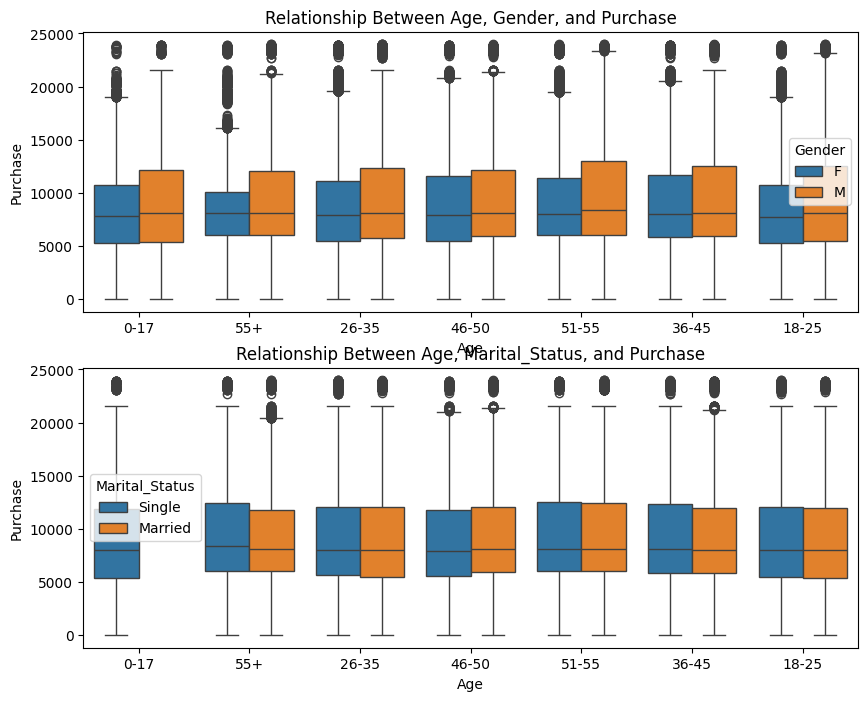

In [ ]:
fig,axes=plt.subplots(nrows=2,ncols=1,figsize=(10, 8))
sns.boxplot(data=df, x='Age', y='Purchase', hue='Gender',ax=axes[0])
sns.boxplot(data=df, x='Age', y='Purchase', hue='Marital_Status',ax=axes[1])
axes[0].set_title('Relationship Between Age, Gender, and Purchase')
axes[1].set_title('Relationship Between Age, Marital_Status, and Purchase')
plt.show()

**Observations**
* In all the age groups males customers are more
* The data is equally distributed in all the age groups with respect to purchase except in 0-17 age agroup

Text(0.5, 1.0, 'Females avg Spend')

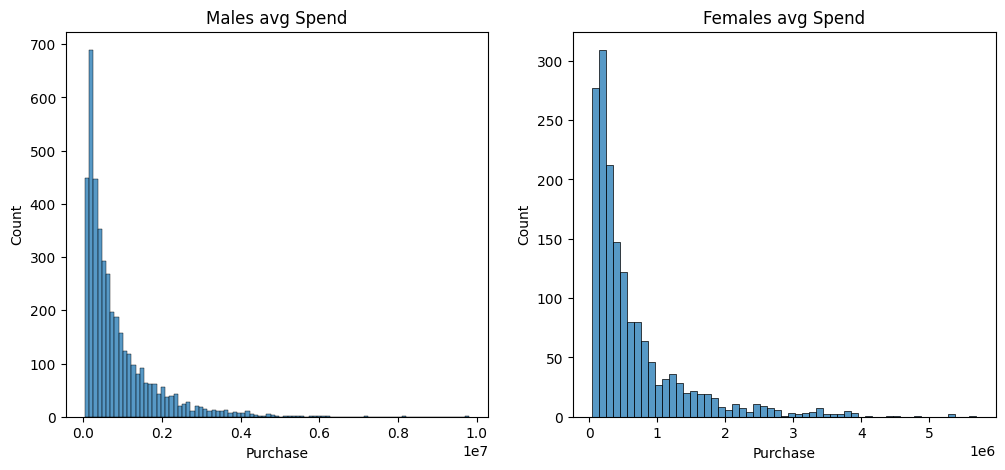

In [ ]:
#Female avg spend vs Male avg spend
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(12,5))
sns.histplot(avg_spend[avg_spend['Gender']=='M']['Purchase'],ax=axes[0])
sns.histplot(avg_spend[avg_spend['Gender']=='F']['Purchase'],ax=axes[1])
axes[0].set_title('Males avg Spend')
axes[1].set_title('Females avg Spend')

**Observation**
+ Average amount spent by males is higher then females

**#Uisng Central limit theorm to compute interval of mean avg spending of Male and female using different sample sizes**

In [ ]:
'''For sample size = 300'''

# Computing Z-score for different Confidence interval
Z_90=1.645
Z_95=1.96
Z_99=2.576
sample_size=300
avg_spend=df.groupby(['User_ID','Gender'])[['Purchase']].sum().reset_index()
# Calculating the  population mean for average spend of Men
men_data=avg_spend[avg_spend['Gender']=='M']
x=[np.mean(men_data['Purchase'].sample(300,replace=True)) for i in range (10000)]
Sample_mean_men=np.mean(x)
# Calculating the  population mean for average spend of Women
women_data=avg_spend[avg_spend['Gender']=='F']
y=[np.mean(women_data['Purchase'].sample(300,replace=True)) for i in range (10000)]
Sample_mean_women=np.mean(y)
print('Sample_mean_men :',Sample_mean_men)
print('Sample_mean_women:',Sample_mean_women)

#Finding the standard error
sigma_men = np.std(men_data['Purchase'])
std_error_men = sigma_men / (np.sqrt(300))
print('Standard_error_men_data:', std_error_men)
sigma_women=np.std(women_data['Purchase'])
std_error_women=sigma_women/(np.sqrt(300))
print('Standard_error_men_data:', std_error_women)

#Finding Confidence Interval for 90 %
print('Confidence Interval fro 90%')

Upper_Bound_men=(Sample_mean_men + Z_90*std_error_men)
Lower_Bound_men =(Sample_mean_men - Z_90*std_error_men)

Upper_Bound_women=(Sample_mean_women + Z_90*std_error_men)
Lower_Bound_women =(Sample_mean_women - Z_90*std_error_men)

M_Width =Upper_Bound_men-Lower_Bound_men
W_Width=Upper_Bound_women-Lower_Bound_women

print('MEN_CI=',[Upper_Bound_men,Lower_Bound_men])
print('Men_width for 90% CI:',M_Width)
print('WOMEN_CI=',[Upper_Bound_women,Lower_Bound_women])
print('Women_width for 90% CI_:',W_Width)
#Finding Confidence Interval for 95 %
print('Confidence Interval fOR 95%')

Upper_Bound_men=(Sample_mean_men + Z_95*std_error_men)
Lower_Bound_men =(Sample_mean_men - Z_95*std_error_men)

Upper_Bound_women=(Sample_mean_women + Z_95*std_error_men)
Lower_Bound_women =(Sample_mean_women - Z_95*std_error_women)

M_Width =Upper_Bound_men-Lower_Bound_men
W_Width=Upper_Bound_women-Lower_Bound_women


print('MEN_CI=',[Upper_Bound_men,Lower_Bound_men])
print('Men_width for 95% CI:',M_Width)
print('WOMEN_CI=',[Upper_Bound_women,Lower_Bound_women])
print('Women_width FOR 95% CI:',W_Width)


#Finding Confidence Interval for 99 %
print('Confidence Interval fOR 99%')

Upper_Bound_men=(Sample_mean_men + Z_99*std_error_men)
Lower_Bound_men =(Sample_mean_men - Z_99*std_error_men)

Upper_Bound_women=(Sample_mean_women + Z_99*std_error_women)
Lower_Bound_women =(Sample_mean_women - Z_95*std_error_women)

M_Width =Upper_Bound_men-Lower_Bound_men
W_Width=Upper_Bound_women-Lower_Bound_women


print('MEN_CI for 95% CI=',[Upper_Bound_men,Lower_Bound_men])
print('Men_width:',M_Width)
print('WOMEN_CI=',[Upper_Bound_women,Lower_Bound_women])
print('Women_width for 95% CI:',W_Width)















Sample_mean_men : 926151.5543229999
Sample_mean_women: 712452.7619836667
Standard_error_men_data: 56910.191277280064
Standard_error_men_data: 46599.57884067893
Confidence Interval fro 90%
MEN_CI= [1019768.8189741257, 832534.2896718741]
Men_width for 90% CI: 187234.52930225153
WOMEN_CI= [806070.0266347923, 618835.497332541]
Women_width for 90% CI_: 187234.5293022513
Confidence Interval fOR 95%
MEN_CI= [1037695.5292264689, 814607.5794195309]
Men_width for 95% CI: 223087.94980693795
WOMEN_CI= [823996.7368871357, 621117.587455936]
Women_width FOR 95% CI: 202879.14943119965
Confidence Interval fOR 99%
MEN_CI for 95% CI= [1072752.2070532735, 779550.9015927265]
Men_width: 293201.305460547
WOMEN_CI= [832493.2770772557, 621117.587455936]
Women_width for 95% CI: 211375.68962131965


In [ ]:
'''For sample size = 3000'''

# Computing Z-score for different Confidence interval
Z_90=1.645
Z_95=1.96
Z_99=2.576
sample_size=3000
avg_spend=df.groupby(['User_ID','Gender'])[['Purchase']].sum().reset_index()
# Calculating the  population mean for average spend of Men
men_data=avg_spend[avg_spend['Gender']=='M']
x=[np.mean(men_data['Purchase'].sample(3000,replace=True)) for i in range (10000)]
Sample_mean_men=np.mean(x)
# Calculating the  population mean for average spend of Women
women_data=avg_spend[avg_spend['Gender']=='F']
y=[np.mean(women_data['Purchase'].sample(3000,replace=True)) for i in range (10000)]
Sample_mean_women=np.mean(y)
print('Sample_mean_men :',Sample_mean_men)
print('Sample_mean_women:',Sample_mean_women)

#Finding the standard error
sigma_men = np.std(men_data['Purchase'])
std_error_men = sigma_men / (np.sqrt(3000))
print('Standard_error_men_data:', std_error_men)
sigma_women=np.std(women_data['Purchase'])
std_error_women=sigma_women/(np.sqrt(3000))
print('Standard_error_men_data:', std_error_women)

#Finding Confidence Interval for 90 %
print('Confidence Interval fro 90%')

Upper_Bound_men=(Sample_mean_men + Z_90*std_error_men)
Lower_Bound_men =(Sample_mean_men - Z_90*std_error_men)

Upper_Bound_women=(Sample_mean_women + Z_90*std_error_women)
Lower_Bound_women =(Sample_mean_women - Z_90*std_error_women)

M_Width =Upper_Bound_men-Lower_Bound_men
W_Width=Upper_Bound_women-Lower_Bound_women

print('MEN_CI=',[Upper_Bound_men,Lower_Bound_men])
print('Men_width for 90% CI:',M_Width)
print('WOMEN_CI=',[Upper_Bound_women,Lower_Bound_women])
print('Women_width for 90% CI_:',W_Width)
#Finding Confidence Interval for 95 %
print('Confidence Interval fOR 95%')

Upper_Bound_men=(Sample_mean_men + Z_95*std_error_men)
Lower_Bound_men =(Sample_mean_men - Z_95*std_error_men)

Upper_Bound_women=(Sample_mean_women + Z_95*std_error_women)
Lower_Bound_women =(Sample_mean_women - Z_95*std_error_women)

M_Width =Upper_Bound_men-Lower_Bound_men
W_Width=Upper_Bound_women-Lower_Bound_women


print('MEN_CI=',[Upper_Bound_men,Lower_Bound_men])
print('Men_width for 95% CI:',M_Width)
print('WOMEN_CI=',[Upper_Bound_women,Lower_Bound_women])
print('Women_width FOR 95% CI:',W_Width)


#Finding Confidence Interval for 99 %
print('Confidence Interval fOR 99%')

Upper_Bound_men=(Sample_mean_men + Z_99*std_error_men)
Lower_Bound_men =(Sample_mean_men - Z_99*std_error_men)

Upper_Bound_women=(Sample_mean_women + Z_99*std_error_women)
Lower_Bound_women =(Sample_mean_women - Z_95*std_error_women)

M_Width =Upper_Bound_men-Lower_Bound_men
W_Width=Upper_Bound_women-Lower_Bound_women


print('MEN_CI for 95% CI=',[Upper_Bound_men,Lower_Bound_men])
print('Men_width:',M_Width)
print('WOMEN_CI=',[Upper_Bound_women,Lower_Bound_women])
print('Women_width for 95% CI:',W_Width)

Sample_mean_men : 925610.1180841334
Sample_mean_women: 712084.7964073666
Standard_error_men_data: 17996.58265120521
Standard_error_men_data: 14736.08071411341
Confidence Interval fro 90%
MEN_CI= [955214.4965453659, 896005.7396229008]
Men_width for 90% CI: 59208.75692246505
WOMEN_CI= [736325.6491820832, 687843.9436326501]
Women_width for 90% CI_: 48481.70554943313
Confidence Interval fOR 95%
MEN_CI= [960883.4200804955, 890336.8160877712]
Men_width for 95% CI: 70546.60399272433
WOMEN_CI= [740967.5146070289, 683202.0782077044]
Women_width FOR 95% CI: 57765.436399324564
Confidence Interval fOR 99%
MEN_CI for 95% CI= [971969.314993638, 879250.9211746288]
Men_width: 92718.39381900919
WOMEN_CI= [750044.9403269228, 683202.0782077044]
Women_width for 95% CI: 66842.86211921845


In [ ]:
'''For sample size = 30000'''

# Computing Z-score for different Confidence interval
Z_90=1.645
Z_95=1.96
Z_99=2.576
sample_size=30000
avg_spend=df.groupby(['User_ID','Gender'])[['Purchase']].sum().reset_index()
# Calculating the  population mean for average spend of Men
men_data=avg_spend[avg_spend['Gender']=='M']
x=[np.mean(men_data['Purchase'].sample(30000,replace=True)) for i in range (10000)]
Sample_mean_men=np.mean(x)
# Calculating the  population mean for average spend of Women
women_data=avg_spend[avg_spend['Gender']=='F']
y=[np.mean(women_data['Purchase'].sample(30000,replace=True)) for i in range (10000)]
Sample_mean_women=np.mean(y)
print('Sample_mean_men :',Sample_mean_men)
print('Sample_mean_women:',Sample_mean_women)

#Finding the standard error
sigma_men = np.std(men_data['Purchase'])
std_error_men = sigma_men / (np.sqrt(30000))
print('Standard_error_men_data:', std_error_men)
sigma_women=np.std(women_data['Purchase'])
std_error_women=sigma_women/(np.sqrt(30000))
print('Standard_error_men_data:', std_error_women)

#Finding Confidence Interval for 90 %
print('Confidence Interval fro 90%')

Upper_Bound_men=(Sample_mean_men + Z_90*std_error_men)
Lower_Bound_men =(Sample_mean_men - Z_90*std_error_men)

Upper_Bound_women=(Sample_mean_women + Z_90*std_error_women)
Lower_Bound_women =(Sample_mean_women - Z_90*std_error_women)

M_Width =Upper_Bound_men-Lower_Bound_men
W_Width=Upper_Bound_women-Lower_Bound_women

print('MEN_CI=',[Upper_Bound_men,Lower_Bound_men])
print('Men_width for 90% CI:',M_Width)
print('WOMEN_CI=',[Upper_Bound_women,Lower_Bound_women])
print('Women_width for 90% CI_:',W_Width)
#Finding Confidence Interval for 95 %
print('Confidence Interval fOR 95%')

Upper_Bound_men=(Sample_mean_men + Z_95*std_error_men)
Lower_Bound_men =(Sample_mean_men - Z_95*std_error_men)

Upper_Bound_women=(Sample_mean_women + Z_95*std_error_women)
Lower_Bound_women =(Sample_mean_women - Z_95*std_error_women)

M_Width =Upper_Bound_men-Lower_Bound_men
W_Width=Upper_Bound_women-Lower_Bound_women


print('MEN_CI=',[Upper_Bound_men,Lower_Bound_men])
print('Men_width for 95% CI:',M_Width)
print('WOMEN_CI=',[Upper_Bound_women,Lower_Bound_women])
print('Women_width FOR 95% CI:',W_Width)


#Finding Confidence Interval for 99 %
print('Confidence Interval fOR 99%')

Upper_Bound_men=(Sample_mean_men + Z_99*std_error_men)
Lower_Bound_men =(Sample_mean_men - Z_99*std_error_men)

Upper_Bound_women=(Sample_mean_women + Z_99*std_error_women)
Lower_Bound_women =(Sample_mean_women - Z_95*std_error_women)

M_Width =Upper_Bound_men-Lower_Bound_men
W_Width=Upper_Bound_women-Lower_Bound_women


print('MEN_CI for 95% CI=',[Upper_Bound_men,Lower_Bound_men])
print('Men_width:',M_Width)
print('WOMEN_CI=',[Upper_Bound_women,Lower_Bound_women])
print('Women_width for 95% CI:',W_Width)

Sample_mean_men : 925359.87129737
Sample_mean_women: 711983.7069484066
Standard_error_men_data: 5691.019127728007
Standard_error_men_data: 4659.957884067894
Confidence Interval fro 90%
MEN_CI= [934721.5977624825, 915998.1448322574]
Men_width for 90% CI: 18723.45293022506
WOMEN_CI= [719649.3376676983, 704318.076229115]
Women_width for 90% CI_: 15331.261438583257
Confidence Interval fOR 95%
MEN_CI= [936514.2687877169, 914205.473807023]
Men_width for 95% CI: 22308.79498069384
WOMEN_CI= [721117.2244011797, 702850.1894956336]
Women_width FOR 95% CI: 18267.034905546112
Confidence Interval fOR 99%
MEN_CI for 95% CI= [940019.9365703973, 910699.8060243425]
Men_width: 29320.130546054803
WOMEN_CI= [723987.7584577656, 702850.1894956336]
Women_width for 95% CI: 21137.568962131976


Text(0.5, 1.0, 'Women_distribution_means Sample size=30000')

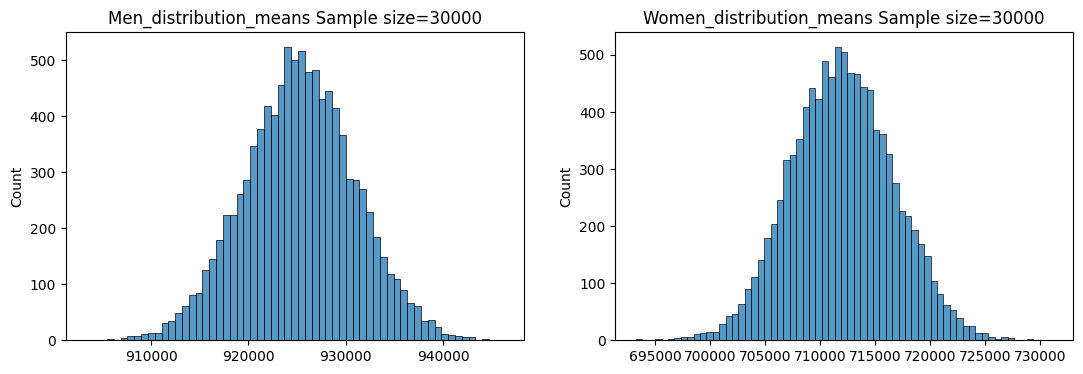

In [ ]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(13,4))
sns.histplot(x,ax=axes[0])
sns.histplot(y,ax=axes[1])

axes[0].set_title('Men_distribution_means Sample size=30000')
axes[1].set_title('Women_distribution_means Sample size=30000')

**Observations**
+ As the sample size is increasing the sample mean tends to come closer to popuation mean
+ As the sample size increase the std error is decresing narrowing down the spread of data
+ Majority of data is covered under 99% Confidence Interval

**Insights**
+
The analysis highlights the importance of sample size in estimating population parameters. It suggests that as the sample size increases, the confidence
intervals become narrower and more precise . In business, this implies that larger sample sizes can provide more reliable insights and estimates.

+ Men tend to spend more money per transaction on average than women , as the upper bounds of the confidence intervals for men are consistently
higher than those for women across different sample sizes.


**#Uisng Central limit theorm to compute interval of mean avg spending of Married and Single using different sample sizes**

In [ ]:
'''For sample size = 300'''

# Computing Z-score for different Confidence interval
Z_90=1.645
Z_95=1.96
Z_99=2.576
sample_size=300
avg_spend=df.groupby(['User_ID','Marital_Status'])[['Purchase']].sum().reset_index()
# Calculating the  population mean for average spend of Single
single_data=avg_spend[avg_spend['Marital_Status']=='Single']
x=[np.mean(single_data['Purchase'].sample(300,replace=True)) for i in range (10000)]
Sample_mean_single=np.mean(x)
# Calculating the  population mean for average spend of Married
married_data=avg_spend[avg_spend['Marital_Status']=='Married']
y=[np.mean(married_data['Purchase'].sample(300,replace=True)) for i in range (10000)]
Sample_mean_married=np.mean(y)
print('Sample_mean_single :',Sample_mean_single)
print('Sample_mean_married:',Sample_mean_married)

#Finding the standard error
sigma_single = np.std(single_data['Purchase'])
std_error_single = sigma_single / (np.sqrt(300))
print('Standard_error_single_data:', std_error_single)
sigma_married=np.std(married_data['Purchase'])
std_error_married=sigma_married/(np.sqrt(300))
print('Standard_error_single_data:', std_error_married)

#Finding Confidence Interval for 90 %
print('Confidence Interval fro 90%')

Upper_Bound_single=(Sample_mean_single + Z_90*std_error_single)
Lower_Bound_single =(Sample_mean_single - Z_90*std_error_single)

Upper_Bound_married=(Sample_mean_married + Z_90*std_error_married)
Lower_Bound_married =(Sample_mean_married - Z_90*std_error_married)

S_Width =Upper_Bound_single-Lower_Bound_single
M_Width=Upper_Bound_married-Lower_Bound_married

print('SINGLE_CI=',[Upper_Bound_single,Lower_Bound_single])
print('Single_width for 90% CI:',S_Width)
print('MARRIED_CI=',[Upper_Bound_married,Lower_Bound_married])
print('Married_width for 90% CI_:',M_Width)
#Finding Confidence Interval for 95 %
print('Confidence Interval fOR 95%')

Upper_Bound_single=(Sample_mean_single + Z_95*std_error_single)
Lower_Bound_single =(Sample_mean_single - Z_95*std_error_single)

Upper_Bound_married=(Sample_mean_married+ Z_95*std_error_married)
Lower_Bound_married =(Sample_mean_married - Z_95*std_error_married)

S_Width =Upper_Bound_single-Lower_Bound_single
M_Width=Upper_Bound_married-Lower_Bound_married


print('SINGLE_CI=',[Upper_Bound_single,Lower_Bound_single])
print('Single_width for 95% CI:',S_Width)
print('MARRIED_CI=',[Upper_Bound_married,Lower_Bound_married])
print('Married_width FOR 95% CI:',M_Width)


#Finding Confidence Interval for 99 %
print('Confidence Interval fro 99%')

Upper_Bound_single=(Sample_mean_single + Z_99*std_error_single)
Lower_Bound_single =(Sample_mean_single - Z_99*std_error_single)

Upper_Bound_married=(Sample_mean_married + Z_99*std_error_married)
Lower_Bound_women =(Sample_mean_married - Z_99*std_error_married)

S_Width =Upper_Bound_single-Lower_Bound_single
M_Width=Upper_Bound_married-Lower_Bound_married

print('SINGLE_CI=',[Upper_Bound_single,Lower_Bound_single])
print('Single_width for 99% CI:',S_Width)
print('MARRIED_CI=',[Upper_Bound_married,Lower_Bound_married])
print('Married_width for 99% CI_:',M_Width)


Sample_mean_single : 880254.0717746665
Sample_mean_married: 844035.734009
Standard_error_single_data: 54807.70580774725
Standard_error_single_data: 53991.66446103998
Confidence Interval fro 90%
SINGLE_CI= [970412.7478284107, 790095.3957209224]
Single_width for 90% CI: 180317.35210748832
MARRIED_CI= [932852.0220474107, 755219.4459705893]
Married_width for 90% CI_: 177632.57607682142
Confidence Interval fOR 95%
SINGLE_CI= [987677.1751578512, 772830.9683914819]
Single_width for 95% CI: 214846.2067663693
MARRIED_CI= [949859.3963526384, 738212.0716653616]
Married_width FOR 95% CI: 211647.32468727673
Confidence Interval fro 99%
SINGLE_CI= [1021438.7219354234, 739069.4216139097]
Single_width for 99% CI: 282369.3003215138
MARRIED_CI= [983118.261660639, 738212.0716653616]
Married_width for 99% CI_: 244906.18999527732


In [ ]:
'''For sample size = 3000'''

# Computing Z-score for different Confidence interval
Z_90=1.645
Z_95=1.96
Z_99=2.576
sample_size=3000
avg_spend=df.groupby(['User_ID','Marital_Status'])[['Purchase']].sum().reset_index()
# Calculating the  population mean for average spend of Single
single_data=avg_spend[avg_spend['Marital_Status']=='Single']
x=[np.mean(single_data['Purchase'].sample(3000,replace=True)) for i in range (10000)]
Sample_mean_single=np.mean(x)
# Calculating the  population mean for average spend of Married
married_data=avg_spend[avg_spend['Marital_Status']=='Married']
y=[np.mean(married_data['Purchase'].sample(3000,replace=True)) for i in range (10000)]
Sample_mean_married=np.mean(y)
print('Sample_mean_single :',Sample_mean_single)
print('Sample_mean_married:',Sample_mean_married)

#Finding the standard error
sigma_single = np.std(single_data['Purchase'])
std_error_single = sigma_single / (np.sqrt(3000))
print('Standard_error_single_data:', std_error_single)
sigma_married=np.std(married_data['Purchase'])
std_error_married=sigma_married/(np.sqrt(3000))
print('Standard_error_single_data:', std_error_married)

#Finding Confidence Interval for 90 %
print('Confidence Interval fro 90%')

Upper_Bound_single=(Sample_mean_single + Z_90*std_error_single)
Lower_Bound_single =(Sample_mean_single - Z_90*std_error_single)

Upper_Bound_married=(Sample_mean_married + Z_90*std_error_married)
Lower_Bound_married =(Sample_mean_married - Z_90*std_error_married)

S_Width =Upper_Bound_single-Lower_Bound_single
M_Width=Upper_Bound_married-Lower_Bound_married

print('SINGLE_CI=',[Upper_Bound_single,Lower_Bound_single])
print('Single_width for 90% CI:',S_Width)
print('MARRIED_CI=',[Upper_Bound_married,Lower_Bound_married])
print('Married_width for 90% CI_:',M_Width)
#Finding Confidence Interval for 95 %
print('Confidence Interval fOR 95%')

Upper_Bound_single=(Sample_mean_single + Z_95*std_error_single)
Lower_Bound_single =(Sample_mean_single - Z_95*std_error_single)

Upper_Bound_married=(Sample_mean_married+ Z_95*std_error_married)
Lower_Bound_married =(Sample_mean_married - Z_95*std_error_married)

S_Width =Upper_Bound_single-Lower_Bound_single
M_Width=Upper_Bound_married-Lower_Bound_married


print('SINGLE_CI=',[Upper_Bound_single,Lower_Bound_single])
print('Single_width for 95% CI:',S_Width)
print('MARRIED_CI=',[Upper_Bound_married,Lower_Bound_married])
print('Married_width FOR 95% CI:',M_Width)


#Finding Confidence Interval for 99 %
print('Confidence Interval fro 99%')

Upper_Bound_single=(Sample_mean_single + Z_99*std_error_single)
Lower_Bound_single =(Sample_mean_single - Z_99*std_error_single)

Upper_Bound_married=(Sample_mean_married + Z_99*std_error_married)
Lower_Bound_women =(Sample_mean_married - Z_99*std_error_married)

S_Width =Upper_Bound_single-Lower_Bound_single
M_Width=Upper_Bound_married-Lower_Bound_married

print('SINGLE_CI=',[Upper_Bound_single,Lower_Bound_single])
print('Single_width for 99% CI:',S_Width)
print('MARRIED_CI=',[Upper_Bound_married,Lower_Bound_married])
print('Married_width for 99% CI_:',M_Width)

Sample_mean_single : 880766.7008692668
Sample_mean_married: 843499.5063928333
Standard_error_single_data: 17331.718368091984
Standard_error_single_data: 17073.663436045375
Confidence Interval fro 90%
SINGLE_CI= [909277.3775847781, 852256.0241537554]
Single_width for 90% CI: 57021.353431022726
MARRIED_CI= [871585.6827451279, 815413.3300405387]
Married_width for 90% CI_: 56172.352704589255
Confidence Interval fOR 95%
SINGLE_CI= [914736.868870727, 846796.5328678065]
Single_width for 95% CI: 67940.33600292052
MARRIED_CI= [876963.8867274822, 810035.1260581844]
Married_width FOR 95% CI: 66928.76066929777
Confidence Interval fro 99%
SINGLE_CI= [925413.2073854717, 836120.1943530618]
Single_width for 99% CI: 89293.01303240983
MARRIED_CI= [887481.2634040862, 810035.1260581844]
Married_width for 99% CI_: 77446.1373459018


In [ ]:
'''For sample size = 30000'''

# Computing Z-score for different Confidence interval
Z_90=1.645
Z_95=1.96
Z_99=2.576
sample_size=30000
avg_spend=df.groupby(['User_ID','Marital_Status'])[['Purchase']].sum().reset_index()
# Calculating the  population mean for average spend of Single
single_data=avg_spend[avg_spend['Marital_Status']=='Single']
x=[np.mean(single_data['Purchase'].sample(30000,replace=True)) for i in range (10000)]
Sample_mean_single=np.mean(x)
# Calculating the  population mean for average spend of Married
married_data=avg_spend[avg_spend['Marital_Status']=='Married']
y=[np.mean(married_data['Purchase'].sample(30000,replace=True)) for i in range (10000)]
Sample_mean_married=np.mean(y)
print('Sample_mean_single :',Sample_mean_single)
print('Sample_mean_married:',Sample_mean_married)

#Finding the standard error
sigma_single = np.std(single_data['Purchase'])
std_error_single = sigma_single / (np.sqrt(30000))
print('Standard_error_single_data:', std_error_single)
sigma_married=np.std(married_data['Purchase'])
std_error_married=sigma_married/(np.sqrt(30000))
print('Standard_error_single_data:', std_error_married)

#Finding Confidence Interval for 90 %
print('Confidence Interval fro 90%')

Upper_Bound_single=(Sample_mean_single + Z_90*std_error_single)
Lower_Bound_single =(Sample_mean_single - Z_90*std_error_single)

Upper_Bound_married=(Sample_mean_married + Z_90*std_error_married)
Lower_Bound_married =(Sample_mean_married - Z_90*std_error_married)

S_Width =Upper_Bound_single-Lower_Bound_single
M_Width=Upper_Bound_married-Lower_Bound_married

print('SINGLE_CI=',[Upper_Bound_single,Lower_Bound_single])
print('Single_width for 90% CI:',S_Width)
print('MARRIED_CI=',[Upper_Bound_married,Lower_Bound_married])
print('Married_width for 90% CI_:',M_Width)
#Finding Confidence Interval for 95 %
print('Confidence Interval fOR 95%')

Upper_Bound_single=(Sample_mean_single + Z_95*std_error_single)
Lower_Bound_single =(Sample_mean_single - Z_95*std_error_single)

Upper_Bound_married=(Sample_mean_married+ Z_95*std_error_married)
Lower_Bound_married =(Sample_mean_married - Z_95*std_error_married)

S_Width =Upper_Bound_single-Lower_Bound_single
M_Width=Upper_Bound_married-Lower_Bound_married


print('SINGLE_CI=',[Upper_Bound_single,Lower_Bound_single])
print('Single_width for 95% CI:',S_Width)
print('MARRIED_CI=',[Upper_Bound_married,Lower_Bound_married])
print('Married_width FOR 95% CI:',M_Width)


#Finding Confidence Interval for 99 %
print('Confidence Interval fro 99%')

Upper_Bound_single=(Sample_mean_single + Z_99*std_error_single)
Lower_Bound_single =(Sample_mean_single - Z_99*std_error_single)

Upper_Bound_married=(Sample_mean_married + Z_99*std_error_married)
Lower_Bound_women =(Sample_mean_married - Z_99*std_error_married)

S_Width =Upper_Bound_single-Lower_Bound_single
M_Width=Upper_Bound_married-Lower_Bound_married

print('SINGLE_CI=',[Upper_Bound_single,Lower_Bound_single])
print('Single_width for 99% CI:',S_Width)
print('MARRIED_CI=',[Upper_Bound_married,Lower_Bound_married])
print('Married_width for 99% CI_:',M_Width)

Sample_mean_single : 880581.1347503967
Sample_mean_married: 843589.5636313666
Standard_error_single_data: 5480.770580774725
Standard_error_single_data: 5399.166446103998
Confidence Interval fro 90%
SINGLE_CI= [889597.0023557711, 871565.2671450223]
Single_width for 90% CI: 18031.735210748855
MARRIED_CI= [852471.1924352077, 834707.9348275255]
Married_width for 90% CI_: 17763.257607682142
Confidence Interval fOR 95%
SINGLE_CI= [891323.4450887152, 869838.8244120782]
Single_width for 95% CI: 21484.62067663693
MARRIED_CI= [854171.9298657305, 833007.1973970027]
Married_width FOR 95% CI: 21164.732468727743
Confidence Interval fro 99%
SINGLE_CI= [894699.5997664724, 866462.6697343211]
Single_width for 99% CI: 28236.930032151286
MARRIED_CI= [857497.8163965305, 833007.1973970027]
Married_width for 99% CI_: 24490.618999527767


**Observations**
+

In [ ]:
# Computing Z-score for different Confidence interval
Z_90=1.645
Z_95=1.96
Z_99=2.576
sample_size=300
age_group=df['Age'].value_counts.values
for i in age_group

  x=[np.mean(i.sample(300,replace=True)) for i in range (10000)]
  Sample_mean_age=np.mean(x)
  print('Sample_mean_age :',i,Sample_mean_age_0_17)
  sigma = np.std(agedata['_Purchase'])
std_error_0_17 = sigma_0_17 / (np.sqrt(300))
Upper_Bound_age_0_17=(Sample_mean_age_0_17 + Z_90*std_error_0_17)
Lower_Bound_age_0_17 =(Sample_mean_age_0_17 - Z_90*std_error_0_17)
Width_0_17 =Upper_Bound_age_0_17-Lower_Bound_age_0_17
print('MEN_CI=',[Upper_Bound_men,Lower_Bound_men])
print('Men_width for 90% CI:',M_Width)

Text(0.5, 1.0, 'Married_distribution_means Sample size=30000')

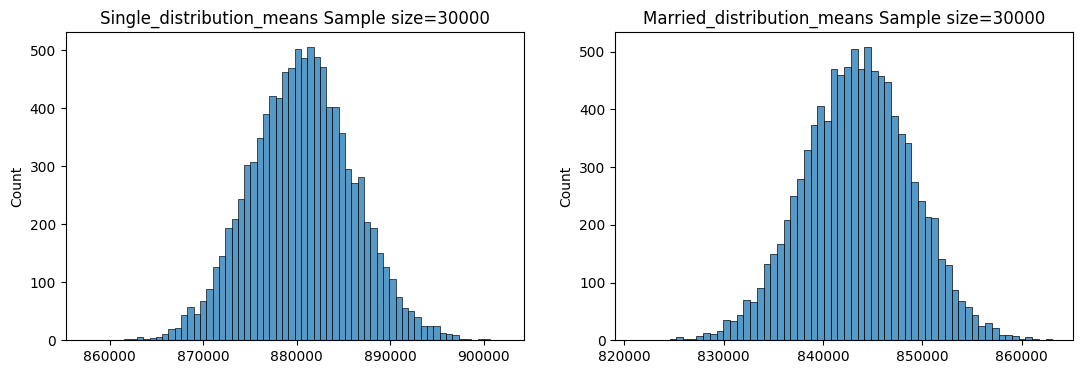

In [ ]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(13,4))
sns.histplot(x,ax=axes[0])
sns.histplot(y,ax=axes[1])

axes[0].set_title('Single_distribution_means Sample size=30000')
axes[1].set_title('Married_distribution_means Sample size=30000')

In [ ]:
df['Age'].value_counts()

Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

**Observations**
+ As the sample size is increasing the sample mean tends to come closer to popuation mean
+ As the sample size increase the std error is decresing narrowing down the spread of data
+ Majority of data is covered under 99% Confidence Interval

**Insights**
+ Sample Size
The analysis highlights the importance of sample size in estimating population parameters. It suggests that as the sample size increases, the confidence
intervals become narrower and more precise . In business, this implies that larger sample sizes can provide more reliable insights and estimates.
+ Confidence Intervals
From the above analysis, we can see that the confidence interval overlap for all the sample sizes. This means that there is no statistically
significant difference between the average spending per transaction for married and unmarried customers within the given samples.


In [ ]:
'''For sample size = 300'''

# Computing Z-score for different Confidence interval
Z_90=1.645
Z_95=1.96
Z_99=2.576
sample_size=300
avg_spend=df.groupby(['User_ID','Age'])[['Purchase']].sum().reset_index()
# Calculating the  population mean for average spend of Age(0-17)
age_0_17_data=avg_spend[avg_spend['Age']=='0-17']
x=[np.mean(age_0_17_data['Purchase'].sample(300,replace=True)) for i in range (10000)]
Sample_mean_age_0_17=np.mean(x)
# Calculating the  population mean for average spend of Age(18-25)
age_18_25_data=avg_spend[avg_spend['Age']=='18-25']
y=[np.mean(age_18_25_data['Purchase'].sample(300,replace=True)) for i in range (10000)]
Sample_mean_age_18_25=np.mean(y)
# Calculating the  population mean for average spend of Age(26-35)
age_26_35_data=avg_spend[avg_spend['Age']=='26-35']
z=[np.mean(age_26_35_data['Purchase'].sample(300,replace=True)) for i in range (10000)]
Sample_mean_age_26_35=np.mean(z)
# Calculating the  population mean for average spend of Age(36-45)
age_36_45_data=avg_spend[avg_spend['Age']=='36-45']
a=[np.mean(age_36_45_data['Purchase'].sample(300,replace=True)) for i in range (10000)]
Sample_mean_age_36_45=np.mean(a)
# Calculating the  population mean for average spend of Age(46-50)
age_46_50_data=avg_spend[avg_spend['Age']=='46-50']
b=[np.mean(age_46_50_data['Purchase'].sample(300,replace=True)) for i in range (10000)]
Sample_mean_age_46_50=np.mean(b)
# Calculating the  population mean for average spend of Age(51-55)
age_51_55_data=avg_spend[avg_spend['Age']=='51-55']
c=[np.mean(age_51_55_data['Purchase'].sample(300,replace=True)) for i in range (10000)]
Sample_mean_age_51_55=np.mean(c)
# Calculating the  population mean for average spend of Age(55+)
age_55_data=avg_spend[avg_spend['Age']=='55+']
d=[np.mean(age_55_data['Purchase'].sample(300,replace=True)) for i in range (10000)]
Sample_mean_age_55=np.mean(d)

print('Sample_mean_age(0-17) :',Sample_mean_age_0_17)
print('Sample_mean_age(18-25) :',Sample_mean_age_18_25)
print('Sample_mean_age(26-35) :',Sample_mean_age_26_35)
print('Sample_mean_age(36-45) :',Sample_mean_age_36_45)
print('Sample_mean_age(46-50) :',Sample_mean_age_46_50)
print('Sample_mean_age(51-55) :',Sample_mean_age_51_55)
print('Sample_mean_age(55) :',Sample_mean_age_55)



#Finding the standard error
sigma_0_17 = np.std(age_0_17_data['Purchase'])
sigma_18_25= np.std(age_18_25_data['Purchase'])
sigma_26_35 = np.std(age_26_35_data['Purchase'])
sigma_36_45 = np.std(age_36_45_data['Purchase'])
sigma_46_50 = np.std(age_46_50_data['Purchase'])
sigma_51_55 = np.std(age_51_55_data['Purchase'])
sigma_55 = np.std(age_55_data['Purchase'])
std_error_0_17 = sigma_0_17 / (np.sqrt(300))
std_error_18_25 = sigma_18_25 / (np.sqrt(300))
std_error_26_35 = sigma_26_35 / (np.sqrt(300))
std_error_36_45 = sigma_36_45 / (np.sqrt(300))
std_error_46_50 = sigma_46_50 / (np.sqrt(300))
std_error_51_55 = sigma_51_55 / (np.sqrt(300))
std_error_55 = sigma_55 / (np.sqrt(300))
print('Standard_error_age_0_17:', std_error_0_17)
print('Standard_error_age_18_25:', std_error_18_25)
print('Standard_error_age_26_35:', std_error_26_35)
print('Standard_error_age_36_45:', std_error_36_45)
print('Standard_error_age_46_50:', std_error_46_50)
print('Standard_error_age_51_55:', std_error_51_55)
print('Standard_error_age_55:', std_error_55)







Sample_mean_age(0-17) : 619493.672966
Sample_mean_age(18-25) : 855118.5214906667
Sample_mean_age(26-35) : 990102.9970060001
Sample_mean_age(36-45) : 878380.9731603335
Sample_mean_age(46-50) : 793351.7894306667
Sample_mean_age(51-55) : 763414.6437763334
Sample_mean_age(55) : 539293.197348
Standard_error_age_0_17: 39576.146711111716
Standard_error_age_18_25: 51242.25164626517
Standard_error_age_26_35: 59545.530889817055
Standard_error_age_36_45: 56647.2840266631
Standard_error_age_46_50: 53602.55108942733
Standard_error_age_51_55: 45697.16960423796
Standard_error_age_55: 35602.21032966309
Confidence Interval fro 90%
0_17_CI= [684596.4343057788, 554390.9116262213]
18_25__CI= [939412.0254487728, 770825.0175325605]
26_35_CI= [1088055.3953197491, 892150.5986922511]
36_45_CI= [971565.7553841943, 785196.1909364726]
46_50_CI= [881527.9859727747, 705175.5928885587]
51_55_CI= [838586.4877753048, 688242.799777362]
55_CI= [597858.8333402958, 480727.5613557042]
0_17_width for 90% CI: 130205.52267955

In [ ]:
#Finding Confidence Interval for 90 %
print('Confidence Interval fro 90%')

Upper_Bound_age_0_17=(Sample_mean_age_0_17 + Z_90*std_error_0_17)
Lower_Bound_age_0_17 =(Sample_mean_age_0_17 - Z_90*std_error_0_17)

Upper_Bound_age_18_25=(Sample_mean_age_18_25 + Z_90*std_error_18_25)
Lower_Bound_age_18_25 =(Sample_mean_age_18_25- Z_90*std_error_18_25)

Upper_Bound_age_26_35=(Sample_mean_age_26_35 + Z_90*std_error_26_35)
Lower_Bound_age_26_35 =(Sample_mean_age_26_35 - Z_90*std_error_26_35)

Upper_Bound_age_36_45=(Sample_mean_age_36_45 + Z_90*std_error_36_45)
Lower_Bound_age_36_45 =(Sample_mean_age_36_45 - Z_90*std_error_36_45)

Upper_Bound_age_46_50=(Sample_mean_age_46_50 + Z_90*std_error_46_50)
Lower_Bound_age_46_50=(Sample_mean_age_46_50 - Z_90*std_error_46_50)

Upper_Bound_age_51_55=(Sample_mean_age_51_55 + Z_90*std_error_51_55)
Lower_Bound_age_51_55 =(Sample_mean_age_51_55 - Z_90*std_error_51_55)

Upper_Bound_age_55=(Sample_mean_age_55 + Z_90*std_error_55)
Lower_Bound_age_55 =(Sample_mean_age_55 - Z_90*std_error_55)

Width_0_17 =Upper_Bound_age_0_17-Lower_Bound_age_0_17
Width_18_25=Upper_Bound_age_18_25-Lower_Bound_age_18_25
Width_26_35=Upper_Bound_age_26_35-Lower_Bound_age_26_35
Width_36_45=Upper_Bound_age_36_45-Lower_Bound_age_36_45
Width_46_50=Upper_Bound_age_46_50-Lower_Bound_age_46_50
Width_51_55=Upper_Bound_age_51_55-Lower_Bound_age_51_55
Width_55=Upper_Bound_age_55-Lower_Bound_age_55



print('0_17_CI=',[Upper_Bound_age_0_17,Lower_Bound_age_0_17])
print('18_25__CI=',[Upper_Bound_age_18_25,Lower_Bound_age_18_25])
print('26_35_CI=',[Upper_Bound_age_26_35,Lower_Bound_age_26_35])
print('36_45_CI=',[Upper_Bound_age_36_45,Lower_Bound_age_36_45])
print('46_50_CI=',[Upper_Bound_age_46_50,Lower_Bound_age_46_50])
print('51_55_CI=',[Upper_Bound_age_51_55,Lower_Bound_age_51_55])
print('55_CI=',[Upper_Bound_age_55,Lower_Bound_age_55])

print('0_17_width for 90% CI:', Width_0_17)
print('18_25_width for 90% CI:', Width_18_25)
print('26_35width for 90% CI:', Width_26_35)
print('36_45_width for 90% CI:', Width_36_45)
print('46_50_width for 90% CI:', Width_36_45)
print('51_55_width for 90% CI:', Width_51_55)
print('55_width for 90% CI:', Width_55)


In [ ]:
#Finding Confidence Interval for 95 %
print('Confidence Interval fro 95%')

Upper_Bound_age_0_17=(Sample_mean_age_0_17 + Z_95*std_error_0_17)
Lower_Bound_age_0_17 =(Sample_mean_age_0_17 - Z_95*std_error_0_17)

Upper_Bound_age_18_25=(Sample_mean_age_18_25 + Z_95*std_error_18_25)
Lower_Bound_age_18_25 =(Sample_mean_age_18_25- Z_95*std_error_18_25)

Upper_Bound_age_26_35=(Sample_mean_age_26_35 + Z_95*std_error_26_35)
Lower_Bound_age_26_35 =(Sample_mean_age_26_35 - Z_95*std_error_26_35)

Upper_Bound_age_36_45=(Sample_mean_age_36_45 + Z_95*std_error_36_45)
Lower_Bound_age_36_45 =(Sample_mean_age_36_45 - Z_95*std_error_36_45)

Upper_Bound_age_46_50=(Sample_mean_age_46_50 + Z_95*std_error_46_50)
Lower_Bound_age_46_50=(Sample_mean_age_46_50 - Z_95*std_error_46_50)

Upper_Bound_age_51_55=(Sample_mean_age_51_55 + Z_95*std_error_51_55)
Lower_Bound_age_51_55 =(Sample_mean_age_51_55 - Z_95*std_error_51_55)

Upper_Bound_age_55=(Sample_mean_age_55 + Z_95*std_error_55)
Lower_Bound_age_55 =(Sample_mean_age_55 - Z_95*std_error_55)

Width_0_17 =Upper_Bound_age_0_17-Lower_Bound_age_0_17
Width_18_25=Upper_Bound_age_18_25-Lower_Bound_age_18_25
Width_26_35=Upper_Bound_age_26_35-Lower_Bound_age_26_35
Width_36_45=Upper_Bound_age_36_45-Lower_Bound_age_36_45
Width_46_50=Upper_Bound_age_46_50-Lower_Bound_age_46_50
Width_51_55=Upper_Bound_age_51_55-Lower_Bound_age_51_55
Width_55=Upper_Bound_age_55-Lower_Bound_age_55



print('0_17_CI=',[Upper_Bound_age_0_17,Lower_Bound_age_0_17])
print('18_25__CI=',[Upper_Bound_age_18_25,Lower_Bound_age_18_25])
print('26_35_CI=',[Upper_Bound_age_26_35,Lower_Bound_age_26_35])
print('36_45_CI=',[Upper_Bound_age_36_45,Lower_Bound_age_36_45])
print('46_50_CI=',[Upper_Bound_age_46_50,Lower_Bound_age_46_50])
print('51_55_CI=',[Upper_Bound_age_51_55,Lower_Bound_age_51_55])
print('55_CI=',[Upper_Bound_age_55,Lower_Bound_age_55])

print('0_17_width for 90% CI:', Width_0_17)
print('18_25_width for 90% CI:', Width_18_25)
print('26_35width for 90% CI:', Width_26_35)
print('36_45_width for 90% CI:', Width_36_45)
print('46_50_width for 90% CI:', Width_36_45)
print('51_55_width for 90% CI:', Width_51_55)
print('55_width for 90% CI:', Width_55)


Confidence Interval fro 95%
0_17_CI= [697062.920519779, 541924.4254122211]
18_25__CI= [955553.3347173464, 754683.708263987]
26_35_CI= [1106812.2375500416, 873393.7564619588]
36_45_CI= [989409.6498525932, 767352.2964680737]
46_50_CI= [898412.7895659443, 688290.7892953891]
51_55_CI= [852981.0962006398, 673848.191352027]
55_CI= [609073.5295941397, 469512.86510186037]
0_17_width for 90% CI: 155138.49510755786
18_25_width for 90% CI: 200869.62645335938
26_35width for 90% CI: 233418.4810880829
36_45_width for 90% CI: 222057.35338451946
46_50_width for 90% CI: 222057.35338451946
51_55_width for 90% CI: 179132.90484861284
55_width for 90% CI: 139560.6644922793


In [ ]:
#Finding Confidence Interval for 99 %
print('Confidence Interval fro 99%')

Upper_Bound_age_0_17=(Sample_mean_age_0_17 + Z_99*std_error_0_17)
Lower_Bound_age_0_17 =(Sample_mean_age_0_17 - Z_99*std_error_0_17)

Upper_Bound_age_18_25=(Sample_mean_age_18_25 + Z_99*std_error_18_25)
Lower_Bound_age_18_25 =(Sample_mean_age_18_25- Z_99*std_error_18_25)

Upper_Bound_age_26_35=(Sample_mean_age_26_35 + Z_99*std_error_26_35)
Lower_Bound_age_26_35 =(Sample_mean_age_26_35 - Z_99*std_error_26_35)

Upper_Bound_age_36_45=(Sample_mean_age_36_45 + Z_99*std_error_36_45)
Lower_Bound_age_36_45 =(Sample_mean_age_36_45 - Z_99*std_error_36_45)

Upper_Bound_age_46_50=(Sample_mean_age_46_50 + Z_99*std_error_46_50)
Lower_Bound_age_46_50=(Sample_mean_age_46_50 - Z_99*std_error_46_50)

Upper_Bound_age_51_55=(Sample_mean_age_51_55 + Z_99*std_error_51_55)
Lower_Bound_age_51_55 =(Sample_mean_age_51_55 - Z_99*std_error_51_55)

Upper_Bound_age_55=(Sample_mean_age_55 + Z_99*std_error_55)
Lower_Bound_age_55 =(Sample_mean_age_55 - Z_99*std_error_55)

Width_0_17 =Upper_Bound_age_0_17-Lower_Bound_age_0_17
Width_18_25=Upper_Bound_age_18_25-Lower_Bound_age_18_25
Width_26_35=Upper_Bound_age_26_35-Lower_Bound_age_26_35
Width_36_45=Upper_Bound_age_36_45-Lower_Bound_age_36_45
Width_46_50=Upper_Bound_age_46_50-Lower_Bound_age_46_50
Width_51_55=Upper_Bound_age_51_55-Lower_Bound_age_51_55
Width_55=Upper_Bound_age_55-Lower_Bound_age_55



print('0_17_CI=',[Upper_Bound_age_0_17,Lower_Bound_age_0_17])
print('18_25__CI=',[Upper_Bound_age_18_25,Lower_Bound_age_18_25])
print('26_35_CI=',[Upper_Bound_age_26_35,Lower_Bound_age_26_35])
print('36_45_CI=',[Upper_Bound_age_36_45,Lower_Bound_age_36_45])
print('46_50_CI=',[Upper_Bound_age_46_50,Lower_Bound_age_46_50])
print('51_55_CI=',[Upper_Bound_age_51_55,Lower_Bound_age_51_55])
print('55_CI=',[Upper_Bound_age_55,Lower_Bound_age_55])

print('0_17_width for 90% CI:', Width_0_17)
print('18_25_width for 90% CI:', Width_18_25)
print('26_35width for 90% CI:', Width_26_35)
print('36_45_width for 90% CI:', Width_36_45)
print('46_50_width for 90% CI:', Width_36_45)
print('51_55_width for 90% CI:', Width_51_55)
print('55_width for 90% CI:', Width_55)


Confidence Interval fro 99%
0_17_CI= [721441.8268938238, 517545.5190381763]
18_25__CI= [987118.5617314457, 723118.4812498876]
26_35_CI= [1143492.2845781688, 836713.7094338314]
36_45_CI= [1024304.3768130176, 732457.5695076493]
46_50_CI= [931431.9610370315, 655271.6178243019]
51_55_CI= [881130.5526768505, 645698.7348758164]
55_CI= [631004.4911572122, 447581.9035387879]
0_17_width for 90% CI: 203896.30785564752
18_25_width for 90% CI: 264000.0804815581
26_35width for 90% CI: 306778.5751443374
36_45_width for 90% CI: 291846.80730536836
46_50_width for 90% CI: 291846.80730536836
51_55_width for 90% CI: 235431.81780103408
55_width for 90% CI: 183422.58761842427


**Observations**
+ We can see the sample means are closer to the population mean for the differnt age groups
+ With greater confidence interval we have the upper limit and lower limit range increases. As we have seen for gender and marital status


**Reccomendations**

* **Target Male Shoppers**
Since male customers account for a significant portion of Black Friday sales and tend to spend more per transaction on average, Walmart should tailor its marketing
strategies and product offerings to incentivize higher spending among male customers while ensuring competitive pricing for female-oriented products.
***Focus on 26 - 45 Age Group**
With the age group between 26 and 45 contributing to the majority of sales, Walmart should specifically cater to the preferences and needs of this demographic.This could
include offering exclusive deals on products that are popular among this age group.
*   **Engage Younger Shoppers**
Knowing that customers in the 0 - 17 age group have the lowest spending per transaction, Walmart can try to increase their spending per transaction by offering them
more attractive discounts, coupons, or rewards programs. It's essential to start building brand loyalty among younger consumers.
* **Customer Segmentation**
Since customers in the 18 - 25, 26 - 35, and 46 - 50 age groups exhibit similar buying characteristics, and so do the customers in 36 - 45 and 55+, Walmart can optimize
its product selection to cater to the preferences of these age groups. Also, Walmart can use this information to adjust their pricing strategies for different age groups.
* **Enhance the 51 - 55 Age Group Shopping Experience**
Considering that customers aged 51 - 55 have the highest spending per transaction, Walmart offer them exclusive pre-sale access, special discount or provide
personalized product recommendations for this age group. Walmart can also introduce loyalty programs specifically designed to reward and retain customers in the 51 -
55 age group.
* **Post-Black Friday Engagement**
After Black Friday, walmart should engage with customers who made purchases by sending follow-up emails or offers for related products. This can help increase
customer retention and encourage repeat business throughout the holiday season and beyond.






